# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data_hospital_readmissions/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/root/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df[81:-3].head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


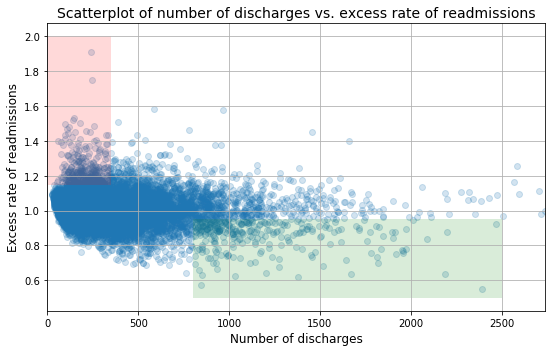

In [20]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission ratio is 1.023 and 63% have excess readmission ratio greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission ratio is 0.978 and 44% have excess readmission ratio greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?


Overall, I partially agree with the above analysis and I disagree with the recommendations for the following two reasons:

1. I think it is important to look at the actual number of readmissions that the hospitals had during this period of study. A scatter plot of number of discharges and number of readmissions might show a different relationship than the portrayed scatter plot. The excess rate of admissions is calculated based on predicted readmissions rate and the expected readmissions rate. This means that the excess rate of readmissions is a number calculated on predictions and expectations. I think it would be better to make recommendations based on the number of readmissions that already happened.
2. The portrayed scatter plot above shows that there's not a strong relationship between number of discharges and excess rate of admissions. It's hard to make any kind of recommendations after observing the weak correlation presented in this scatter plot.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis.



**Overall, rate of readmissions is trending down with increasing number of discharges**
* I will test this statement by calculating a correlation coefficient.

In [18]:
# define a function to calculate Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [24]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)
round(r_obs, 3)

-0.093

The correlation between `Number of Discharges` and `Excess Readmission Ratio` is -0.093. Although it is technically true that the rate of readmissions is trending down with increasing number of discharges, it is a very weak trend. Further, let's do a hypothesis test of correlation using simulation to see if this correlation could have been due to random chance.

****
## Hypothesis Test of Correlation

Procedure:

1. Null hypothesis: `Number of Discharges` and `Excess Readmission Ratio` are completely uncorrelated. That is, $\rho = 0$.
* Alternative hypothesis: `Number of Discharges` and `Excess Readmission Ratio` are negatively correlated. That is, $\rho < 0$.
* Simulate the data assuming null hypothesis is true by permuting the `Number of Discharges` column 10000 times and calculating the correlation with `Excess Readmission Ratio` column. This will create 10000 permuted replicates of sample Pearson correlation $r$.
* Use sample Pearson correlation, $r$, as a test statistic.
* Compute p-value as fraction of permuted replicates that have $r$ less than or equal to observed $r$.

In [32]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    x_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted, y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


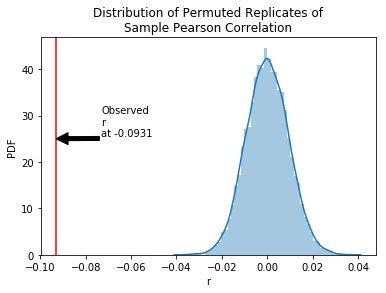

In [33]:
# Generate a visual result of this correlation test
_ = sns.distplot(perm_replicates, norm_hist = True)
_ = plt.axvline(x=r_obs, color = 'red')
_ = plt.title('Distribution of Permuted Replicates of\nSample Pearson Correlation')
_ = plt.xlabel('r')
_ = plt.ylabel('PDF')
_ = plt.annotate('Observed\nr\nat {}'.format(round(r_obs, 4)), 
                 xy = (r_obs, 25), 
                 xytext = (r_obs + 0.02, 25.5), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

The p-value is essentially zero. I reject the null hypothesis that population Pearson correlation coefficient between `Number of Discharges` and `Excess Readmission Ratio` is zero. The negative correlation between `Number of Discharges` and `Excess Readmission Ratio` seem to be real.

In this case, although the negative correlation between `Number of Discharges` and `Excess Readmission Ratio` is statistically significant, it does not mean that there is much practical significance. The reason for this is because the correlation is so low. `Number of Discharges` and `Excess Readmission Ratio` have a very weak linear relationship. It is dangerous to make policy change recommendations based on this statistic. Further, the weak correlation can be caused by a handful of outliers that skew the relationship between these two variables.

****


**In hospitals/facilities with number of discharges < 100, mean excess readmission ratio is 1.023 and 63% have excess readmission ratio greater than 1**

**In hospitals/facilities with number of discharges > 1000, mean excess readmission ratio is 0.978 and 44% have excess readmission ratio greater than 1**

* Check the validity of these statements by performing the following:
    * Bootstrap two sample test for population means 
        * Test if the population mean excess readmission ratio for hospitals with number of discharges > 1000 is less than the population mean of excess readmission ratio for hospitals with number of discharges < 100.
    * Two sample t test for population means 
        * Test if the population mean excess readmission ratio for hospitals with number of discharges > 1000 is less than the population mean of excess readmission ratio for hospitals with number of discharges < 100.
    * Bootstrap two sample test for population proportions
        * Test if the population proportion for excess readmission ratio greater than 1 amoung hospitals with number of discharges > 1000 is less than the population proportion for excess readmission ratio greater than 1 among hospitals with number of discharges < 100
    * Two sample t test for population proportions
        * Test if the population proportion for excess readmission ratio greater than 1 amoung hospitals with number of discharges > 1000 is less than the population proportion for excess readmission ratio greater than 1 among hospitals with number of discharges < 100

## Bootstrap Two Sample Test for Population Means

First, I will visually inspect the two sample distributions using ECDFs and histograms.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


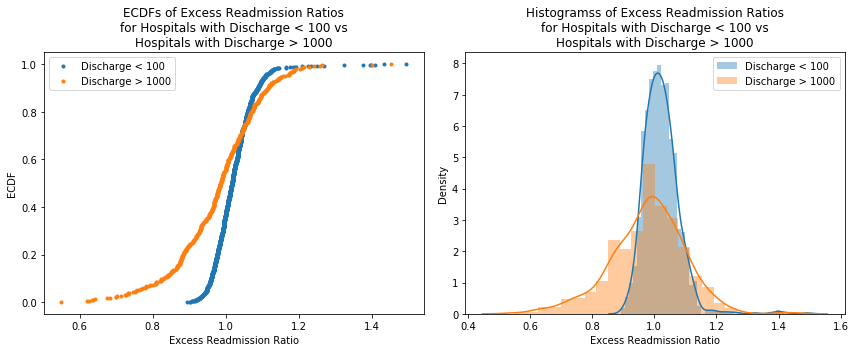

In [68]:
# ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

hospital_no_null = clean_hospital_read_df[81:-3]
discharge_100 = hospital_no_null.loc[hospital_no_null['Number of Discharges'] < 100, 'Excess Readmission Ratio']
discharge_1000 = hospital_no_null.loc[hospital_no_null['Number of Discharges'] > 1000, 'Excess Readmission Ratio']

# calculate points for ecdf for discharge_100 and discharge_1000
x_discharge_100, y_discharge_100 = ecdf(discharge_100)
x_discharge_1000, y_discharge_1000 = ecdf(discharge_1000)

# plot ecdfs of discharge_100 and discharge_1000 excess readmission ratios
fig, (ax_ecdf, ax_hist) = plt.subplots(1, 2, figsize=(12,5))
# ecdf subplot
_ = ax_ecdf.plot(x_discharge_100, y_discharge_100, marker = '.', linestyle = 'none')
_ = ax_ecdf.plot(x_discharge_1000, y_discharge_1000, marker = '.', linestyle = 'none')
_ = ax_ecdf.legend(('Discharge < 100', 'Discharge > 1000'))
_ = ax_ecdf.set_title("""ECDFs of Excess Readmission Ratios
for Hospitals with Discharge < 100 vs\nHospitals with Discharge > 1000""")
_ = ax_ecdf.set_xlabel('Excess Readmission Ratio')
_ = ax_ecdf.set_ylabel('ECDF')

# histogram subplot
_ = sns.distplot(discharge_100, norm_hist = True)
_ = sns.distplot(discharge_1000, norm_hist = True)
_ = ax_hist.set_title("""Histogramss of Excess Readmission Ratios
for Hospitals with Discharge < 100 vs\nHospitals with Discharge > 1000""")
_ = ax_hist.set_ylabel('Density')
_ = ax_hist.legend(('Discharge < 100', 'Discharge > 1000'))
fig.tight_layout()
plt.show()

From the comparison of the ECDFs and histograms, it seems that the distribution of discharge_100 excess readmission ratios and discharge_1000 excess readmission ratios are different. The discharge_100 excess readmission ratios have smaller spread than the discharge_1000 readmission rates.

* **Null Hypothesis**: The average excess readmission ratio between the two distributions are the same
* **Alternative Hypothesis**: The average excess readmission ratio for hospitals with discharges < 100 is higher than the average excess readmission ratio for hospitals with discharges > 1000

Procedure:

1. Combine the two samples and calculate the mean.
2. Recenter the sample means for the two samples.
3. Draw $B$ samples with replacement from the two different recentered samples and calculate the mean. Here, I use $B = 10000$.
4. Calculate the differences of these $B$ sample means between discharge_100 and discharge_1000. This will be the bootstrap sampling distribution of the sample difference in means
5. Calculate the p-value as getting the difference in means greater than the one I observed in the sample.
6. Compare p-value to significance level $\alpha$. In this case, I'll use $\alpha = 0.01$.

In [72]:
# bootstrap test of means

# define functions to use for bootstrapping
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# compute observed means:
empirical_diff_means = np.mean(discharge_100) - np.mean(discharge_1000)

# Generate shifted arrays
discharge_1000_shifted = discharge_1000 - np.mean(discharge_1000) + empirical_diff_means
discharge_100_shifted = discharge_100 - np.mean(discharge_100) + empirical_diff_means

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_1000 = draw_bs_reps(discharge_1000_shifted, np.mean, 10000)
bs_replicates_100 = draw_bs_reps(discharge_100_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_100 - bs_replicates_1000

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000 * 2
print('p-value =', p)

p-value = 0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


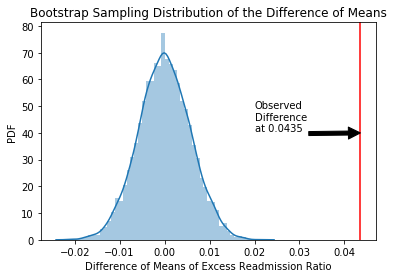

In [78]:
# create plot of bootstrap sampling distribution of difference of means and observed difference
_ = sns.distplot(bs_replicates)
_ = plt.axvline(x=empirical_diff_means, color = 'red')
_ = plt.annotate('Observed\nDifference\nat {}'.format(round(empirical_diff_means, 4)), 
                 xy = (empirical_diff_means, 40), 
                 xytext = (0.02, 40.5), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.title('Bootstrap Sampling Distribution of the Difference of Means')
_ = plt.xlabel('Difference of Means of Excess Readmission Ratio')
_ = plt.ylabel('PDF')
plt.show()

Since p-value is 0.0, at 0.01 significance level, I will reject the null hypothesis that the means of the two distributions are the same. This is supported by the plot above. There is strong evidence that the population mean excess readmission ratio for hospitals with discharges < 100 is higher than that of hospitals with discharges > 1000.

## Two-Sample T-Test

* Null Hypothesis: The average excess readmission ratio between the two distributions are the same
* Alternative Hypothesis: The average excess readmission ratio between the two distributions are different

Check Assumptions:

To perform a two-sample t-test, I will first check the following assumptions.

1. Are the distributions independent from each other?
    * Yes. I can assume that the distributions are independent from each other because the original sample was sampled randomly.
2. Are the samples taken independently?
    * Yes. Same reason as assumption 1.
3. Are the two different distributions from normal distributions?
    * To test this, I will create a QQ-plot.
4. Do the populations have equal variance?
    * To test this, I will perform an F test for testing equal variance.

Test for Normality Assumption: Are the two population distributions normally distributed?

In [40]:
stats.shapiro(discharge_1000)

(0.9679745435714722, 0.09016574919223785)

In [41]:
def normality_test(data, label):
    """Create three plots to test for normality graphically and also perform Shapiro-Wilk Test"""
    # resize figures
    plt.rcParams['figure.figsize'] = [12, 6]
    # use ecdf function as defined above
    global ecdf
    # ecdf for data
    x_data, y_data = ecdf(data)
    data_mean = np.mean(data)
    data_sd = statistics.stdev(data)
    # generate samples from normal distribution with same mean and sd as data
    theo_normal = np.random.normal(loc = data_mean, scale = data_sd, size = 100000)
    # ecdf for theoretical normal distribution
    x_theo, y_theo = ecdf(theo_normal)

    # create plot with three subplots
    f, (qq_plot, hist, ecdf_plot) = plt.subplots(1, 3)
    
    # first plot: qqplot
    sm.qqplot(data, line = 'q', ax = qq_plot)
    qq_plot.set_title('{}:\nQQ-Plot of Sample Distribution and\nTheoretical Normal Distribution'.format(label))
    
    # second plot: histogram of data and theoretical normal distribution
    sns.distplot(data, norm_hist = True, ax = hist)
    sns.distplot(theo_normal, norm_hist = True, ax = hist)
    hist.set_xlabel('excess readmission ratio (degrees F)')
    hist.set_ylabel('PDF')
    hist.legend((label, 'Theoretical\nNormal\nDistribution'), loc = 'upper left')
    hist.set_title('Histogram of\n{}\nand Theoretical Normal Distribution'.format(label))
    
    # third plot: ecdf of data and cdf of theoretical normal distribution
    ecdf_plot.plot(x_data, y_data, marker = '.', linestyle = 'none')
    ecdf_plot.plot(x_theo, y_theo)
    ecdf_plot.legend((label, 'Theoretical\nNormal\nDistribution'), loc = 'upper left')
    ecdf_plot.set_xlabel('excess readmission ratio (degrees F)')
    ecdf_plot.set_ylabel('CDF')
    ecdf_plot.set_title('ECDF of {}\nand CDF of\nTheoretical Normal Distribution'.format(label))
    
    plt.tight_layout()
    plt.show()
    shapiro = stats.shapiro(data)
    print('Shapiro-Wilk Test:\nTest Statistic: {}\np-value: {}'.format(shapiro[0], shapiro[1]))

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


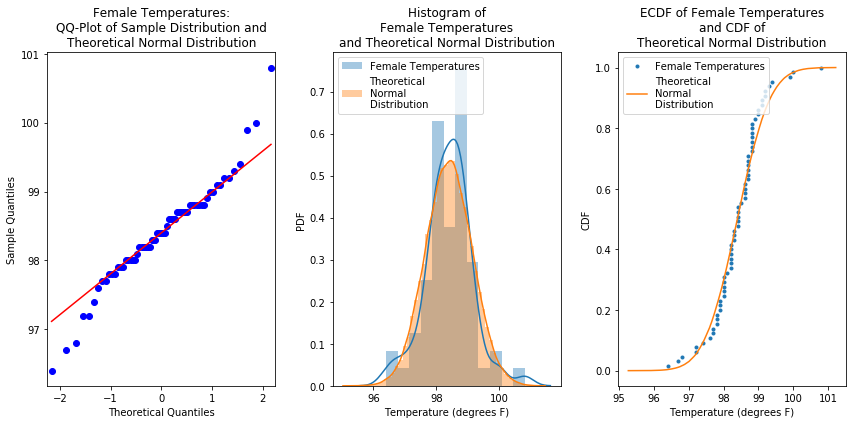

Shapiro-Wilk Test:
Test Statistic: 0.9679745435714722
p-value: 0.09016574919223785


In [42]:
normality_test(discharge_1000, 'discharge_1000 excess readmission ratios')

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


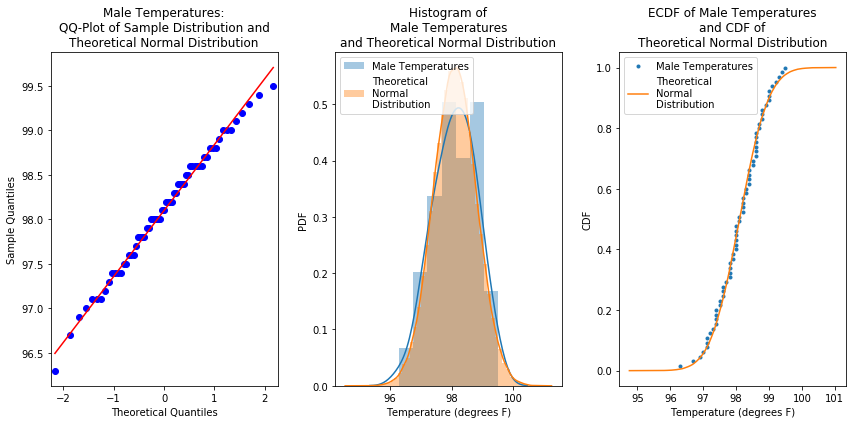

Shapiro-Wilk Test:
Test Statistic: 0.9894071817398071
p-value: 0.8545167446136475


In [43]:
normality_test(discharge_100, 'discharge_100 excess readmission ratios')

Based on the plots and the test, the discharge_1000 data seems to deviate somewhat from the normal distribution. However, it seems like it's safe to assume both populations are normally distributed. So, I will proceed to perform the two-sample t-test.

Procedure:

1. Assume $\mu_{discharge_100_{H_0}} = \mu_{discharge_1000_{H_0}}$. So, under the null hypothesis, difference in means is zero.
2. Test to see if it's valid to assume whether $\sigma^2_{discharge_100} = \sigma^2_{discharge_1000}$.
    * If the two population standard deviations seem to be equal, then perform the pooled t test. That is, use the following estimate for the standard error:  
    
$$standard\:error = s_p\sqrt{1/n_{discharge_100} + 1/n_{discharge_1000}}$$  

where $$s_p^2 = \frac{(n_{discharge_100} - 1)s_{discharge_100}^2 + (n_{discharge_1000} - 1)s_{discharge_1000}^2}{n_{discharge_100} + n_{discharge_1000} - 2}$$

where  
+ $n_{discharge_100}$ is the sample size of discharge_100 excess readmission ratios
+ $n_{discharge_1000}$ is the sample size of discharge_1000 excess readmission ratios
+ $s_{discharge_100}^2$ is the sample variance of discharge_100 excess readmission ratios
+ $s_{discharge_1000}^2$ is the sample variance of discharge_1000 excess readmission ratios

and $df = n_{discharge_100} + n_{discharge_1000} - 2$


- If the two population standard deviations seems to be different, then use the unpooled t test using the following estimate for standard error:
    
$$standard\:error = \sqrt{\frac{s_{discharge_100}^2}{n_{discharge_100}} + \frac{s_{discharge_1000}^2}{n_{discharge_1000}}}$$

and $df$ is complicated (usually calculated by software).  

3. Calculate the test statistic:
$$ t = \frac{\overline{x}_{discharge_100} - \overline{x}_{discharge_1000}}{s.e.}$$  

4. Calculate the p-value as getting the difference in means or more extreme values than the one I observed in the sample. This is a two-sided test.
5. Compare p-value to signifance level $\alpha$. In this case, I'll use $\alpha = 0.01$.

In [44]:
# equal variance f-test
F = np.var(discharge_1000) / np.var(discharge_100) # f-statistic
df1 = len(discharge_1000) - 1 # degrees of freedom 1
df2 = len(discharge_100) - 1 # degrees of freedom 2
p_value = f.cdf(F, df1, df2) # p-value
p_value

0.6894581506101014

Since the p-value is quite high, I can safely assume that the population variances are equal. So, I will use the pooled variance.

In [45]:
# two-sample t-test
ttest_ind(discharge_1000, discharge_100, equal_var = True)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

Based on the p-value, at the 0.01 significance level, I will reject the null hypothesis that the two populations have equal excess readmission ratio means.

In [22]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [26]:
less_than_100 = clean_hospital_read_df[81:-3].loc[clean_hospital_read_df['Number of Discharges'] < 100, 'Excess Readmission Ratio']
less_than_100_mean = less_than_100.mean()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


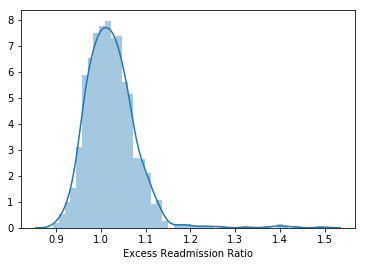

In [31]:
# frequentist approach

# null: mean excess readmission ratio <= 1
# alternative: mean excess readmission ratio > 1

_ = sns.distplot(less_than_100)
plt.show()

In [ ]:
less_than_100_mean

In [37]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


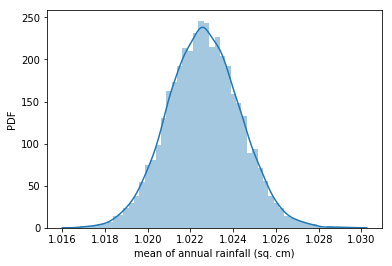

In [41]:
# Generate 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(less_than_100, np.mean, 10000)

# Make a histogram of the results
_ = sns.distplot(bs_replicates)
_ = plt.xlabel('mean of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()